In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import sklearn
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import os
import time
pd.options.display.max_rows = 10
pd.options.display.max_columns = 79

In [2]:
# Loading in Excel doc into a Dataframe
notebook_path = os.path.abspath("DDoS.ipynb")
temp = os.path.abspath("Data")
df = pd.read_csv(temp + "\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", low_memory = False)

In [3]:
# Edits the Column Names
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/s', '_s')

In [4]:
# Changes BENIGN and DDoS into 0 and 1 respectively so they can be plotted
df.Label = df.Label.replace('BENIGN', 0)
df.Label = df.Label.replace('DDoS', 1)

In [5]:
# Moves Label to the front of the list
df = df[['Label', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin']]

In [6]:
# df.dtypes
# df.columns

In [7]:
#Drops any rows with NA
df.dropna(how = 'any', subset = ['Label', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin'], inplace = True)

In [8]:
df

,Label,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes_s,FlowPackets_s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength,BwdHeaderLength,FwdPackets_s,BwdPackets_s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength.1,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,0,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,110091.7431,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,0,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,230769.2308,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,0,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,352941.1765,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,0,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,0,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,196721.3115,32786.88525,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,16393.442620,16393.442620,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,0,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,166666.6667,27777.77778,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,13888.888890,13888.888890,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,0,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,160000,26666.66667,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,13333.333330,13333.333330,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,0,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,250000,41666.66667,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,41666.666670,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [9]:
# Removing infinity columns from FlowBytes and FlowPackets
df = df[~df.FlowBytes_s.str.startswith('Infinity')]
df = df[~df.FlowPackets_s.str.startswith('Infinity')]

In [10]:
# Converts FlowBytes_s and FlowPackets_s to numeric columns
df[['FlowBytes_s']] = df[['FlowBytes_s']].apply(pd.to_numeric)
df[['FlowPackets_s']] = df[['FlowPackets_s']].apply(pd.to_numeric)

In [11]:
# Prints out the number of each unique item in each column
# for i in df.columns:
#     print(df[i].value_counts())
#     print("\n")

In [12]:
# # Making a correlation map
# corr = df.corr()
# plt.figure(figsize=(79, 79))
# heatMap = sns.heatmap(
#     corr,
#     vmin = -1, vmax = 1, center = 0,
#     annot=True,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )

In [13]:
# # make a list of only the numerical columns of input
# # so don't care about the string and Y outputs

# olist = list(df.columns) # original list
# yvlist = list(['Label']) # y variable list

# # make a new list of only the values I want to compare
# xvlist = [x for x in olist if x not in yvlist]

# fcol = 5 # limit five graphs per row for easy visualization
# frow = int(np.ceil(len(xvlist)/fcol)) # number of rows in your subplot
# fhgt = frow*4.5 # set how tall you want the subplot, 4.5 per row seems chill

# # Set up the matplotlib figure
# f, axes = plt.subplots(frow, fcol, figsize=(18, fhgt), sharey=True) #maybe mess around with auto generate figsize?
# sns.despine(left=True)

# # make a list of items to iterate over to produce graph
# axes_list = [item for sublist in axes for item in sublist]

# for k, xvar in enumerate(xvlist):
    
#     sns.regplot(
#         x=xvar, 
#         y='Label', 
#         data=df, 
#         ax=axes_list[k],
#         ci = None, # set the confidence interval to none, so no resampling
#         logx=False,
#         scatter_kws={'color': 'xkcd:cerulean'}, # using xkcd color codes, https://xkcd.com/color/rgb/
#         line_kws={'color': '#840000'} # using hex color codes
#     )

# plt.tight_layout()

In [14]:
df = df[['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
   'TotalBackwardPackets', 'TotalLengthofFwdPackets',
   'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
   'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
   'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
   'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
   'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
   'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
   'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
   'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
   'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
   'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
   'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
   'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
   'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
   'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
   'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
   'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
   'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
   'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
   'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
   'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin', 'Label']]
Y = df.Label
X = df.iloc[:,:-1]
a = time.time()
xtrainDF, xtestDF, ytrainDF, ytestDF = train_test_split(X, Y, test_size=0.4, random_state=10)
sc = StandardScaler()
xtrainDF = sc.fit_transform(xtrainDF)
xtestDF = sc.transform(xtestDF)
lreg = RandomForestClassifier(n_estimators=5000, bootstrap = True, max_features = 'sqrt', random_state = 10)
lfit = lreg.fit(xtrainDF, ytrainDF)
prediction_of_test = lfit.predict(xtestDF)
MSE = (np.sqrt(sklearn.metrics.mean_squared_error(ytestDF, prediction_of_test)))
b = time.time()
print("MSE: ", MSE)
print(((b-a)/60)/60, " Hours")

MSE:  0.007441786409849304
0.22165230347050563  Hours


In [15]:
attack = 0
benign = 0
for i in prediction_of_test:
    if i == 1:
        attack = attack + 1
    else:
        benign = benign + 1

Text(0.5, 1.0, 'Normalized')

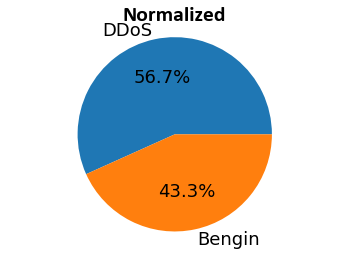

In [24]:
labels = ['DDoS', 'Bengin']
sizes = [attack, benign]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct = '%1.1f%%')
ax.axis('equal')
ax.set_title('Normalized', fontweight='bold', fontname='calibri')

In [17]:
# def fit_model(df_data, df_label):
#     xtrainDF, xtestDF, ytrainDF, ytestDF = train_test_split(df_data, df_label, test_size=0.4, random_state=10)
#     lreg = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state = 10)
#     lfit = lreg.fit(xtrainDF, ytrainDF)
#     prediction_of_test = lfit.predict(xtestDF)
#     return (np.sqrt(sklearn.metrics.mean_squared_error(ytestDF, prediction_of_test)))

# def traverse_df(df_data, df_label):
#     tmp_mse1, tmp_mse2 = fit_model(df_data, df_label), None
#     tmp_df = df_data
#     for i in df_data:
#         tmp_mse2 = fit_model(df_data.drop(i, axis = 1), df_label)
#         if tmp_mse2 < tmp_mse1:
#             tmp_mse1 = tmp_mse2
#             tmp_df = df_data.drop(i, axis = 1)
#     return tmp_mse1, tmp_df




# df_label = df.Label
# df_data = df.iloc[:,:-1]
# MSE_list = {}
# MSE_list[fit_model(df_data, df_label)] = df_data
# j = 0
# a = time.time()
# for i in df_data:
#     print(j)
#     j = j + 1
#     count = 0
#     final_mse = 404
#     final_df = None
#     MSE, new_df = traverse_df(df_data.drop(i, axis = 1), df_label)
#     while True:
#         print(new_df.shape)
#         if MSE < final_mse:
#             print("while: ", count)
#             count = count + 1
#             final_mse = MSE
#             final_df = new_df
#         else:
#             break
#         MSE, new_df = traverse_df(final_df, df_label)
        
#     MSE_list[final_mse] = final_df
# b = time.time()

In [18]:
# fMSE = 404
# fdf = None
# for key in MSE_list:
#     if fMSE > key:
#         fMSE = key
#         fdf = MSE_list[key]

In [19]:
# lfit

In [20]:
# print(fMSE)

In [21]:
# fdf.to_csv(os.getcwd() + '//final-ddos-forest.csv' , index = False)

In [22]:
# for key in MSE_list:
#     print(key)

In [23]:
# for key in MSE_list:
#     print(MSE_list[key].shape)